In [1]:
import pandas as pd
import numpy as np
from numpy import *
import torch
import matplotlib.pyplot as plt
import time

In [2]:
data_length = 150

In [3]:
#pakai pandas
data_input = pd.read_csv('iris_input.csv', header = None)
data_target = pd.read_csv('iris_target.csv', header = None)
print ('Data input\n',data_input,'\nData target\n',data_target)

Data input
        0    1    2    3
0    5.1  3.5  1.4  0.2
1    7.0  3.2  4.7  1.4
2    6.3  3.3  6.0  2.5
3    4.9  3.0  1.4  0.2
4    6.4  3.2  4.5  1.5
5    5.8  2.7  5.1  1.9
6    4.7  3.2  1.3  0.2
7    6.9  3.1  4.9  1.5
8    7.1  3.0  5.9  2.1
9    4.6  3.1  1.5  0.2
10   5.5  2.3  4.0  1.3
11   6.3  2.9  5.6  1.8
12   5.0  3.6  1.4  0.2
13   6.5  2.8  4.6  1.5
14   6.5  3.0  5.8  2.2
15   5.4  3.9  1.7  0.4
16   5.7  2.8  4.5  1.3
17   7.6  3.0  6.6  2.1
18   4.6  3.4  1.4  0.3
19   6.3  3.3  4.7  1.6
20   4.9  2.5  4.5  1.7
21   5.0  3.4  1.5  0.2
22   4.9  2.4  3.3  1.0
23   7.3  2.9  6.3  1.8
24   4.4  2.9  1.4  0.2
25   6.6  2.9  4.6  1.3
26   6.7  2.5  5.8  1.8
27   4.9  3.1  1.5  0.1
28   5.2  2.7  3.9  1.4
29   7.2  3.6  6.1  2.5
..   ...  ...  ...  ...
120  5.0  3.5  1.3  0.3
121  5.5  2.6  4.4  1.2
122  6.7  3.1  5.6  2.4
123  4.5  2.3  1.3  0.3
124  6.1  3.0  4.6  1.4
125  6.9  3.1  5.1  2.3
126  4.4  3.2  1.3  0.2
127  5.8  2.6  4.0  1.2
128  5.8  2.7  5.1  1.9
129 

In [4]:
#ubah ke numpy (dalam matriks)
data_input_np = np.c_[data_input]
data_target_np = np.c_[data_target]
print('Data input dalam matriks\n',data_input_np,'\nData target dalam matriks\n',data_target_np)

Data input dalam matriks
 [[5.1 3.5 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.3 3.3 6.  2.5]
 [4.9 3.  1.4 0.2]
 [6.4 3.2 4.5 1.5]
 [5.8 2.7 5.1 1.9]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 4.9 1.5]
 [7.1 3.  5.9 2.1]
 [4.6 3.1 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [6.3 2.9 5.6 1.8]
 [5.  3.6 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.5 3.  5.8 2.2]
 [5.4 3.9 1.7 0.4]
 [5.7 2.8 4.5 1.3]
 [7.6 3.  6.6 2.1]
 [4.6 3.4 1.4 0.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.5 4.5 1.7]
 [5.  3.4 1.5 0.2]
 [4.9 2.4 3.3 1. ]
 [7.3 2.9 6.3 1.8]
 [4.4 2.9 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 2.5 5.8 1.8]
 [4.9 3.1 1.5 0.1]
 [5.2 2.7 3.9 1.4]
 [7.2 3.6 6.1 2.5]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.2 5.1 2. ]
 [4.8 3.4 1.6 0.2]
 [5.9 3.  4.2 1.5]
 [6.4 2.7 5.3 1.9]
 [4.8 3.  1.4 0.1]
 [6.  2.2 4.  1. ]
 [6.8 3.  5.5 2.1]
 [4.3 3.  1.1 0.1]
 [6.1 2.9 4.7 1.4]
 [5.7 2.5 5.  2. ]
 [5.8 4.  1.2 0.2]
 [5.6 2.9 3.6 1.3]
 [5.8 2.8 5.1 2.4]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [6.4 3.2 5.3 2.3]
 [5.4 3.9 1.3 0.4]
 [5.6 3.  4.5 1.5]
 [6.5 3.  5.5 1.8]
 [5.1

In [5]:
#siap-siap normalisasi data
#masukkan tiap data ke masing-masing variabel
data_sl = data_input_np[:data_length,[0]]
data_sw = data_input_np[:data_length,[1]]
data_pl = data_input_np[:data_length,[2]]
data_pw = data_input_np[:data_length,[3]]

#cek hasil pemindahan
print('Data sepal length\n', data_sl)
print('\nData sepal width\n', data_sw)
print('\nData petal length\n', data_pl)
print('\nData petal width\n', data_pw)

#cari maksimum
max_sl = max(data_sl)
max_sw = max(data_sw)
max_pl = max(data_pl)
max_pw = max(data_pw)

#cari minimum
min_sl = min(data_sl)
min_sw = min(data_sw)
min_pl = min(data_pl)
min_pw = min(data_pw)

Data sepal length
 [[5.1]
 [7. ]
 [6.3]
 [4.9]
 [6.4]
 [5.8]
 [4.7]
 [6.9]
 [7.1]
 [4.6]
 [5.5]
 [6.3]
 [5. ]
 [6.5]
 [6.5]
 [5.4]
 [5.7]
 [7.6]
 [4.6]
 [6.3]
 [4.9]
 [5. ]
 [4.9]
 [7.3]
 [4.4]
 [6.6]
 [6.7]
 [4.9]
 [5.2]
 [7.2]
 [5.4]
 [5. ]
 [6.5]
 [4.8]
 [5.9]
 [6.4]
 [4.8]
 [6. ]
 [6.8]
 [4.3]
 [6.1]
 [5.7]
 [5.8]
 [5.6]
 [5.8]
 [5.7]
 [6.7]
 [6.4]
 [5.4]
 [5.6]
 [6.5]
 [5.1]
 [5.8]
 [7.7]
 [5.7]
 [6.2]
 [7.7]
 [5.1]
 [5.6]
 [6. ]
 [5.4]
 [5.9]
 [6.9]
 [5.1]
 [6.1]
 [5.6]
 [4.6]
 [6.3]
 [7.7]
 [5.1]
 [6.1]
 [6.3]
 [4.8]
 [6.4]
 [6.7]
 [5. ]
 [6.6]
 [7.2]
 [5. ]
 [6.8]
 [6.2]
 [5.2]
 [6.7]
 [6.1]
 [5.2]
 [6. ]
 [6.4]
 [4.7]
 [5.7]
 [7.2]
 [4.8]
 [5.5]
 [7.4]
 [5.4]
 [5.5]
 [7.9]
 [5.2]
 [5.8]
 [6.4]
 [5.5]
 [6. ]
 [6.3]
 [4.9]
 [5.4]
 [6.1]
 [5. ]
 [6. ]
 [7.7]
 [5.5]
 [6.7]
 [6.3]
 [4.9]
 [6.3]
 [6.4]
 [4.4]
 [5.6]
 [6. ]
 [5.1]
 [5.5]
 [6.9]
 [5. ]
 [5.5]
 [6.7]
 [4.5]
 [6.1]
 [6.9]
 [4.4]
 [5.8]
 [5.8]
 [5. ]
 [5. ]
 [6.8]
 [5.1]
 [5.6]
 [6.7]
 [4.8]
 [5.7]
 [6.7]
 [5.1]
 [5.7]
 

In [6]:
#normalisasi sepal length
sl_norm = np.zeros(shape=(data_length,1))

for k in range(data_length):
    sl_norm[k,:] = (data_sl[k] - min_sl) / (max_sl - min_sl)

print('sl_norm\n',sl_norm)

#normalisasi sepal width
sw_norm = np.zeros(shape=(data_length,1))

for k in range(data_length):
    sw_norm[k,:] = (data_sw[k] - min_sw) / (max_sw - min_sw)

print('sw_norm\n',sw_norm)

#normalisasi petal length
pl_norm = np.zeros(shape=(data_length,1))

for k in range(data_length):
    pl_norm[k,:] = (data_pl[k] - min_pl) / (max_pl - min_pl)

print('pl_norm\n',pl_norm)

#normalisasi petal width
pw_norm = np.zeros(shape=(data_length,1))

for k in range(data_length):
    pw_norm[k,:] = (data_pw[k] - min_pw) / (max_pw - min_pw)

print('pw_norm\n',pw_norm)

sl_norm
 [[0.22222222]
 [0.75      ]
 [0.55555556]
 [0.16666667]
 [0.58333333]
 [0.41666667]
 [0.11111111]
 [0.72222222]
 [0.77777778]
 [0.08333333]
 [0.33333333]
 [0.55555556]
 [0.19444444]
 [0.61111111]
 [0.61111111]
 [0.30555556]
 [0.38888889]
 [0.91666667]
 [0.08333333]
 [0.55555556]
 [0.16666667]
 [0.19444444]
 [0.16666667]
 [0.83333333]
 [0.02777778]
 [0.63888889]
 [0.66666667]
 [0.16666667]
 [0.25      ]
 [0.80555556]
 [0.30555556]
 [0.19444444]
 [0.61111111]
 [0.13888889]
 [0.44444444]
 [0.58333333]
 [0.13888889]
 [0.47222222]
 [0.69444444]
 [0.        ]
 [0.5       ]
 [0.38888889]
 [0.41666667]
 [0.36111111]
 [0.41666667]
 [0.38888889]
 [0.66666667]
 [0.58333333]
 [0.30555556]
 [0.36111111]
 [0.61111111]
 [0.22222222]
 [0.41666667]
 [0.94444444]
 [0.38888889]
 [0.52777778]
 [0.94444444]
 [0.22222222]
 [0.36111111]
 [0.47222222]
 [0.30555556]
 [0.44444444]
 [0.72222222]
 [0.22222222]
 [0.5       ]
 [0.36111111]
 [0.08333333]
 [0.55555556]
 [0.94444444]
 [0.22222222]
 [0.5      

In [7]:
#gabungin data input
data_input_ok = np.hstack((sl_norm,sw_norm,pl_norm,pw_norm))
data_target_ok = data_target_np

print('data input\n',data_input_ok)
print('data target\n',data_target_ok)

#save ke csv
np.savetxt("matriks_input.csv",data_input_ok,delimiter=",")
np.savetxt("matriks_target.csv",data_target_ok,delimiter=",")

data input
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.75       0.5        0.62711864 0.54166667]
 [0.55555556 0.54166667 0.84745763 1.        ]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.58333333 0.5        0.59322034 0.58333333]
 [0.41666667 0.29166667 0.69491525 0.75      ]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.72222222 0.45833333 0.66101695 0.58333333]
 [0.77777778 0.41666667 0.83050847 0.83333333]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.33333333 0.125      0.50847458 0.5       ]
 [0.55555556 0.375      0.77966102 0.70833333]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.61111111 0.33333333 0.61016949 0.58333333]
 [0.61111111 0.41666667 0.81355932 0.875     ]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.38888889 0.33333333 0.59322034 0.5       ]
 [0.91666667 0.41666667 0.94915254 0.83333333]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.55555556 0.54166667 0.62711864 0.625     ]
 [0.16666667 0.20833333 0.59322034 0.66666667]
 

In [8]:
#inisialisasi parameter
batch_size = 150
input_dimension = 4
hidden_unit = 24
output_dimension = 3
epoch_max = 1000
loss_plot = np.zeros(shape=(epoch_max,1))
t_plot = np.zeros(shape=(epoch_max,1))
error_now = 1000
target_error = 0.0001
i = 0

#ubah ke tensor
data_input_tensor = torch.from_numpy(data_input_ok).float()
data_target_tensor = torch.from_numpy(data_target_ok).float()

0 0.4054795503616333
0 [0.40547955] [0.]
1 [0.31455445] [1.]
2 [0.26827687] [2.]
3 [0.24379484] [3.]
4 [0.22994465] [4.]
5 [0.22127403] [5.]
6 [0.2151432] [6.]
7 [0.21028522] [7.]
8 [0.20609532] [8.]
9 [0.20228486] [9.]
10 0.19871503114700317
10 [0.19871503] [10.]
11 [0.19531783] [11.]
12 [0.19205876] [12.]
13 [0.18891917] [13.]
14 [0.18588811] [14.]
15 [0.18295839] [15.]
16 [0.18012471] [16.]
17 [0.17738287] [17.]
18 [0.17472926] [18.]
19 [0.17216067] [19.]
20 0.16967423260211945
20 [0.16967423] [20.]
21 [0.16726726] [21.]
22 [0.16493729] [22.]
23 [0.16268198] [23.]
24 [0.16049916] [24.]
25 [0.15838675] [25.]
26 [0.15634283] [26.]
27 [0.15436551] [27.]
28 [0.15245302] [28.]
29 [0.15060365] [29.]
30 0.14881575107574463
30 [0.14881575] [30.]
31 [0.14708772] [31.]
32 [0.14541803] [32.]
33 [0.14380518] [33.]
34 [0.14224769] [34.]
35 [0.14074415] [35.]
36 [0.13929312] [36.]
37 [0.13789326] [37.]
38 [0.13654318] [38.]
39 [0.13524157] [39.]
40 0.13398709893226624
40 [0.1339871] [40.]
41 [0.1

351 [0.09142526] [351.]
352 [0.09139012] [352.]
353 [0.09135509] [353.]
354 [0.09132016] [354.]
355 [0.09128535] [355.]
356 [0.09125064] [356.]
357 [0.09121604] [357.]
358 [0.09118155] [358.]
359 [0.09114717] [359.]
360 0.0911128968000412
360 [0.0911129] [360.]
361 [0.09107873] [361.]
362 [0.09104466] [362.]
363 [0.0910107] [363.]
364 [0.09097684] [364.]
365 [0.09094308] [365.]
366 [0.09090943] [366.]
367 [0.09087588] [367.]
368 [0.09084243] [368.]
369 [0.09080908] [369.]
370 0.09077582508325577
370 [0.09077583] [370.]
371 [0.09074267] [371.]
372 [0.09070962] [372.]
373 [0.09067667] [373.]
374 [0.09064381] [374.]
375 [0.09061105] [375.]
376 [0.09057838] [376.]
377 [0.09054581] [377.]
378 [0.09051333] [378.]
379 [0.09048095] [379.]
380 0.09044866263866425
380 [0.09044866] [380.]
381 [0.09041646] [381.]
382 [0.09038436] [382.]
383 [0.09035234] [383.]
384 [0.09032042] [384.]
385 [0.09028858] [385.]
386 [0.09025683] [386.]
387 [0.09022518] [387.]
388 [0.09019361] [388.]
389 [0.09016213] [3

701 [0.0818482] [701.]
702 [0.08182001] [702.]
703 [0.08179178] [703.]
704 [0.08176353] [704.]
705 [0.08173523] [705.]
706 [0.0817069] [706.]
707 [0.08167853] [707.]
708 [0.08165012] [708.]
709 [0.08162168] [709.]
710 0.08159320801496506
710 [0.08159321] [710.]
711 [0.08156469] [711.]
712 [0.08153615] [712.]
713 [0.08150756] [713.]
714 [0.08147895] [714.]
715 [0.08145028] [715.]
716 [0.08142159] [716.]
717 [0.08139285] [717.]
718 [0.08136409] [718.]
719 [0.08133528] [719.]
720 0.08130642771720886
720 [0.08130643] [720.]
721 [0.08127755] [721.]
722 [0.08124863] [722.]
723 [0.08121967] [723.]
724 [0.08119068] [724.]
725 [0.08116165] [725.]
726 [0.08113258] [726.]
727 [0.08110347] [727.]
728 [0.08107432] [728.]
729 [0.08104514] [729.]
730 0.08101591467857361
730 [0.08101591] [730.]
731 [0.08098665] [731.]
732 [0.08095735] [732.]
733 [0.08092801] [733.]
734 [0.08089863] [734.]
735 [0.08086921] [735.]
736 [0.08083975] [736.]
737 [0.08081026] [737.]
738 [0.08078073] [738.]
739 [0.08075116] [

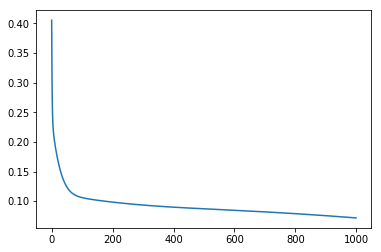

In [9]:
#inisialisasi model
#model = TwoLayerNet(input_dimension, hidden_unit, output_dimension)
model = torch.nn.Sequential(
    torch.nn.Linear(input_dimension, hidden_unit),
    torch.nn.Tanh(),
    torch.nn.Linear(hidden_unit, output_dimension)
)

loss_fcn = torch.nn.MSELoss()

learning_rate = 0.1
#for t in range(epoch_max):
while error_now > target_error and i < epoch_max:
#while i < epoch_max:
#while error_now > target_error:
    y_pred = model(data_input_tensor)
    
    loss = loss_fcn(y_pred,data_target_tensor)
    if i % 10 == 0:
        print(i, loss.item())
        
        
    loss_plot[i] = loss.item()
    t_plot[i] = i
    print(i,loss_plot[i],t_plot[i])
    
    log_weight = list(model.parameters())
    model.zero_grad()
    
    error_now = loss.item()
    
    if i % 50 == 0:
        torch.save(model,'training_f_{}.pt'.format(int(time.time())))

    i += 1
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

#loss_plot_numpy = loss_plot.numpy()
plt.plot(t_plot,loss_plot)
plt.show()

#print(log_weight)
